In [1]:
#standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



#Machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [2]:
#create dataframe of "diamonds.csv"
df = pd.read_csv("diamonds.csv", index_col=0)

In [3]:
#1st five records
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### About Dataset / Feature Info

price: price in US dollars (\$326--\$18,823)

carat: weight of the diamond (0.2--5.01)

cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal)

color: diamond colour, from J (worst) to D (best)

clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

x: length in mm (0--10.74)

y: width in mm (0--58.9)

z: depth in mm (0--31.8)

depth: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

table: width of top of diamond relative to widest point (43--95)

### High level statistics of the dataset: number of points, numer of features

In [4]:
#number of datpoints
df.shape

(53940, 10)

In [5]:
#feature names/column names
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [6]:
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

##### *Observations*

- there are 53940 datapoints with 9 independent variable and 1 dependent variable.

### Objective of the problem.

*To predict the price of diamonds based on their various characteristics, including carat, cut, color, clarity, depth, table, and dimensions (x, y, z).*

In [7]:
#check for duplicate rows
df.duplicated().sum()

146

In [8]:
#as dataset is large we can drop these 146 rows that are duplicate
df = df.drop_duplicates()

In [9]:
df.shape

(53794, 10)

In [10]:
#checking for null values
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

# EDA

In [11]:
df.describe()

,carat,depth,table,price,x,y,z
count,53794.00000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000
mean,0.79778,61.748080,57.458109,3933.065082,5.731214,5.734653,3.538714
std,0.47339,1.429909,2.233679,3988.114460,1.120695,1.141209,0.705037
min,0.20000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.40000,61.000000,56.000000,951.000000,4.710000,4.720000,2.910000
50%,0.70000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.04000,62.500000,59.000000,5326.750000,6.540000,6.540000,4.030000
max,5.01000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


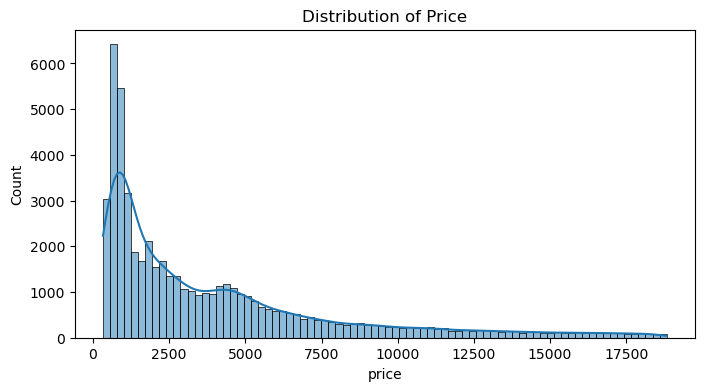

In [12]:
#price distribution
plt.figure(figsize=(8, 4))
sns.histplot(df['price'], kde=True)
plt.title("Distribution of Price")
plt.show()

### *Observations*

There are more diamonds with low price and there are relatively few high-priced diamonds

In [13]:
# Select the numerical features
numerical_features = df.select_dtypes(include=['number'])

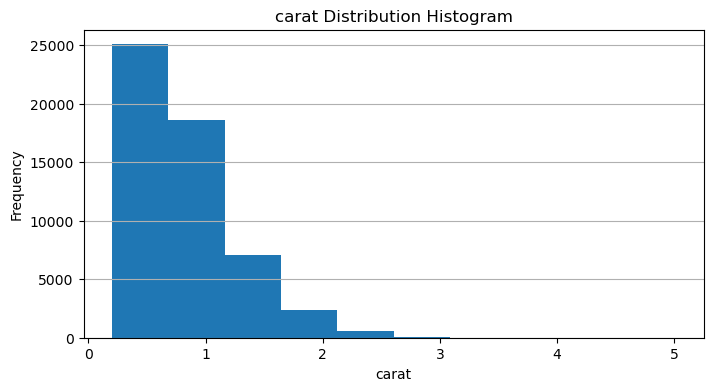

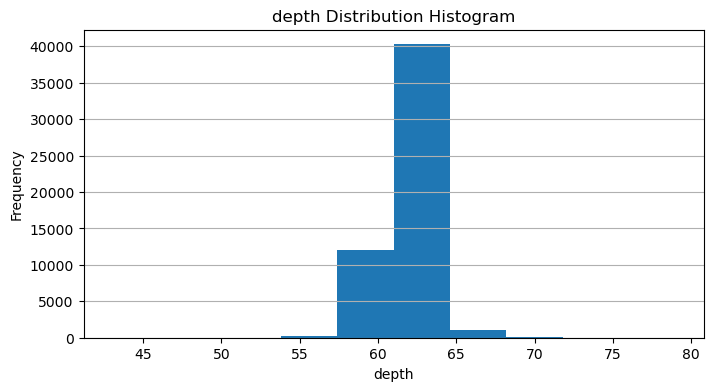

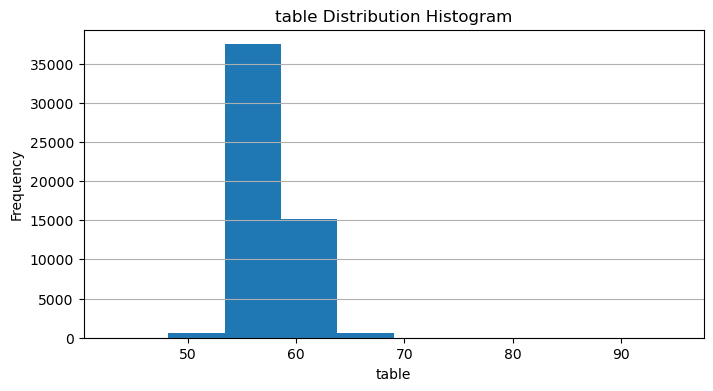

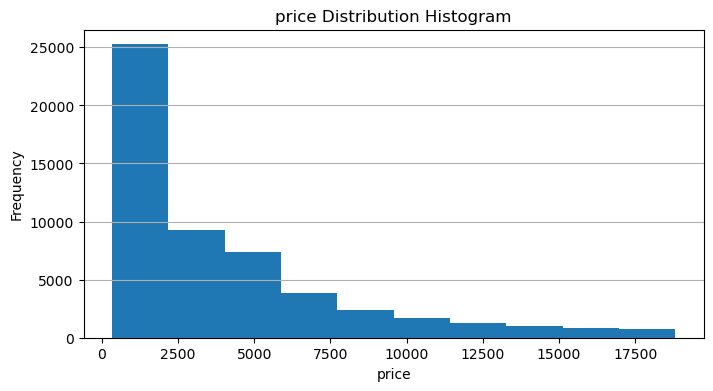

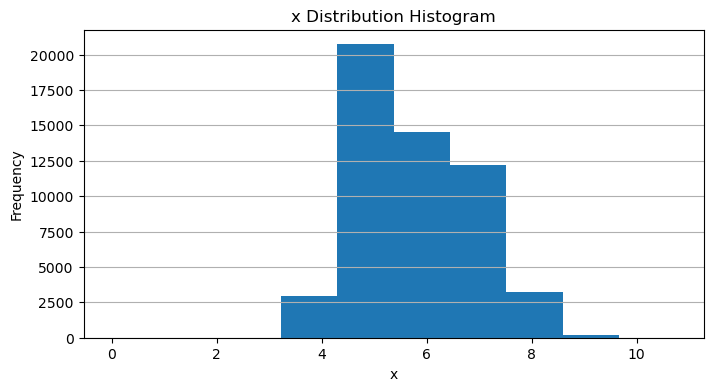

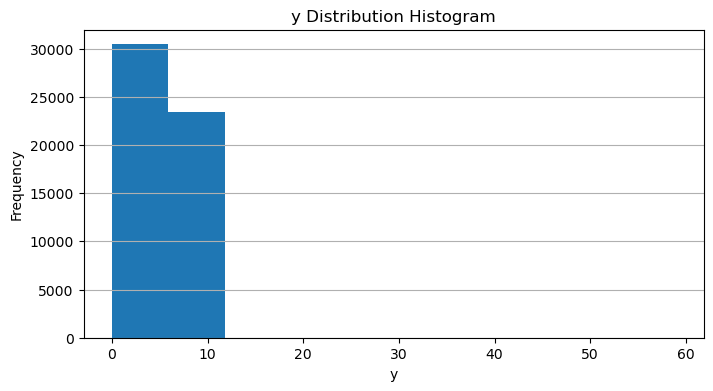

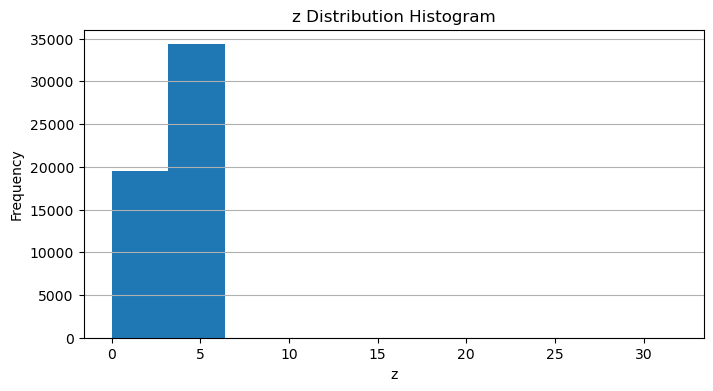

In [14]:
# Looping through numerical features and create histograms
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    plt.hist(df[feature])
    plt.title(f"{feature} Distribution Histogram")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.grid(axis='y')

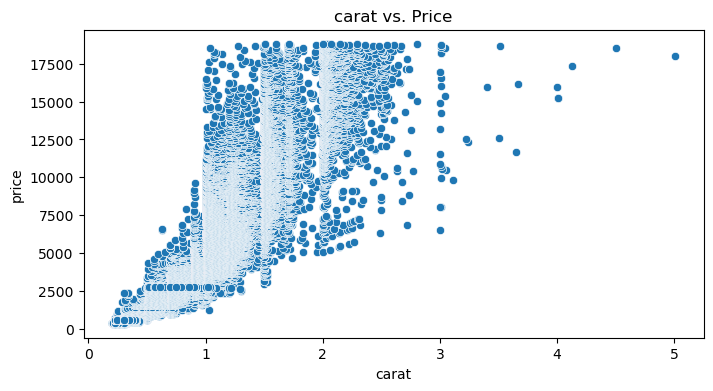

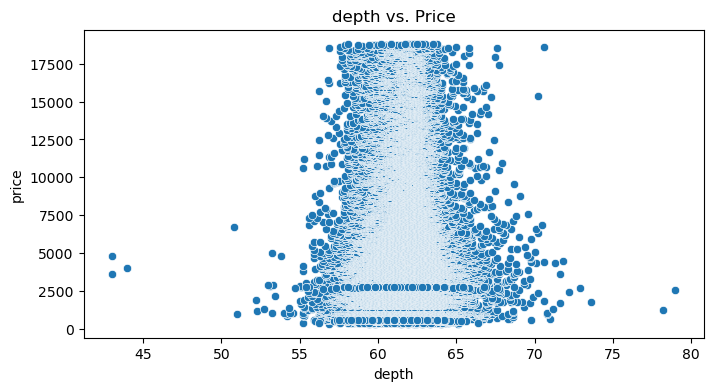

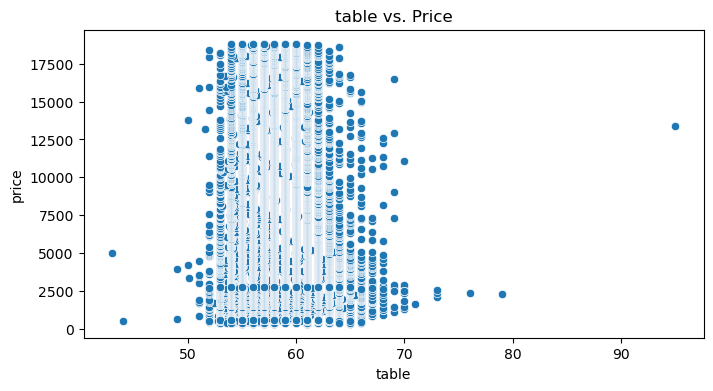

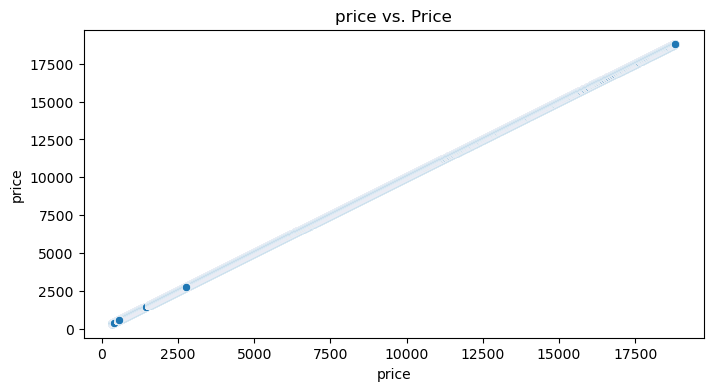

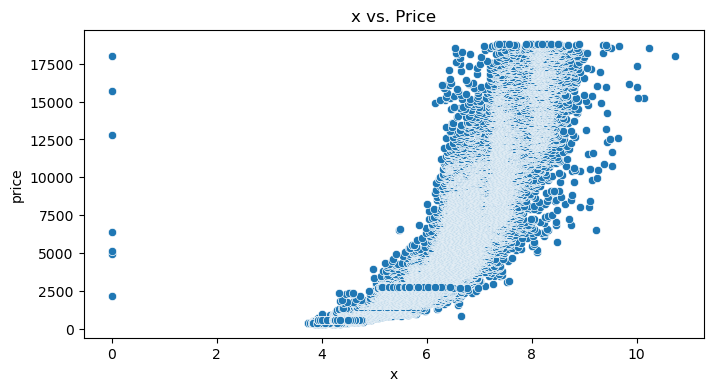

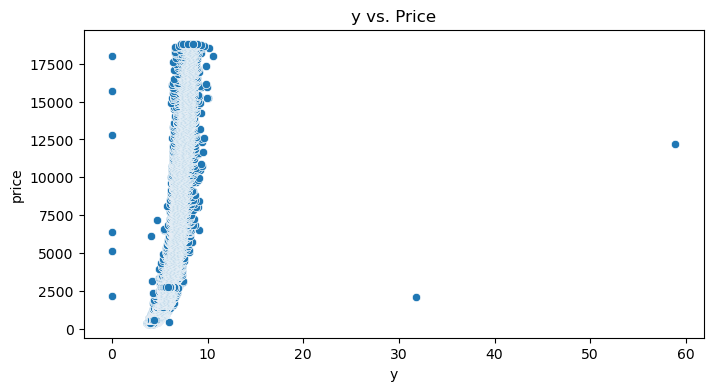

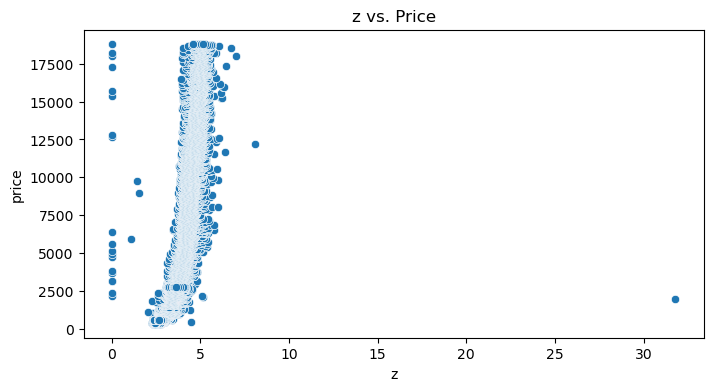

In [15]:
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.scatterplot(x=feature, y='price', data=df)
    plt.title(f"{feature} vs. Price")
    plt.show()

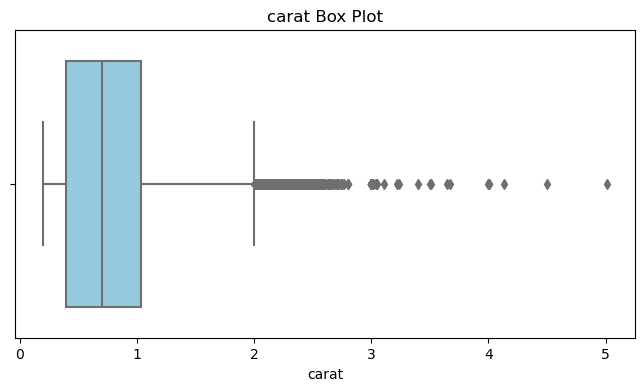

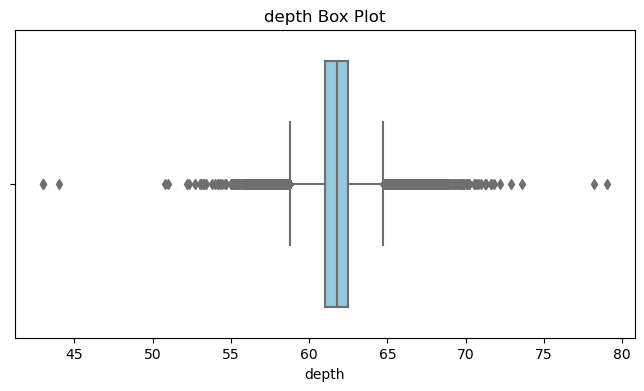

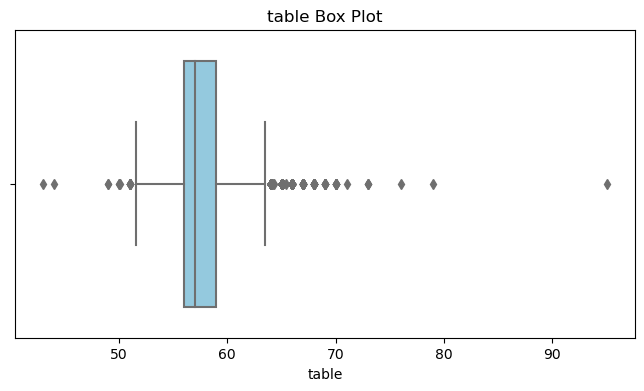

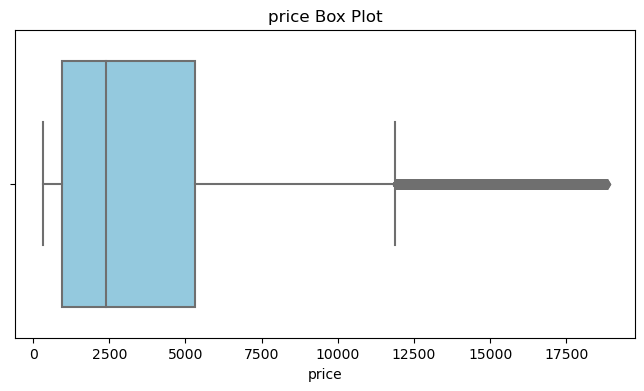

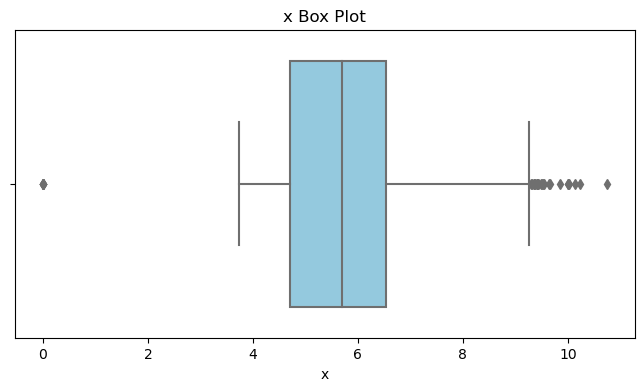

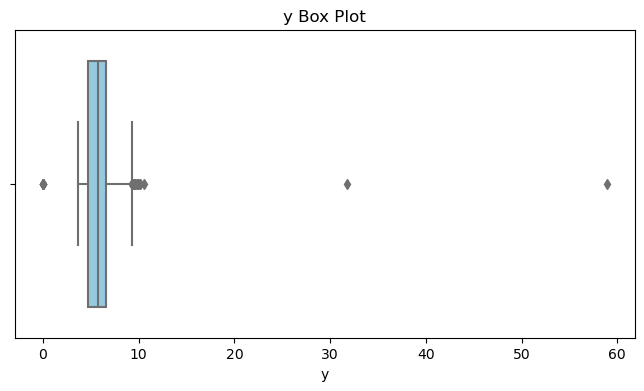

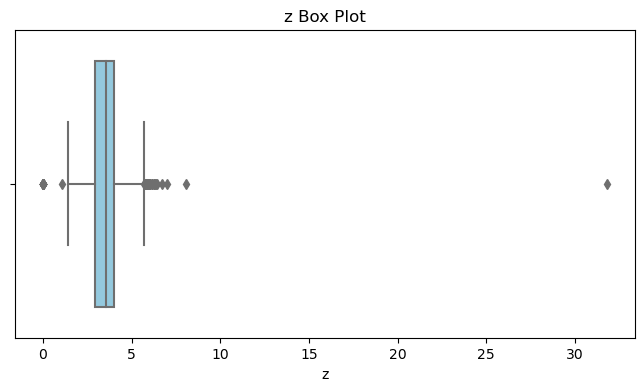

In [16]:
# Looping through numerical features and box plot 
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[feature], data=df, color='skyblue')
    plt.title(f"{feature} Box Plot")
    plt.show()

### *Observations*

- we have outliers in each numerical features.

In [17]:
#categorical features
cat_features = df.select_dtypes(exclude=['number'])

In [18]:
cat_features.columns

Index(['cut', 'color', 'clarity'], dtype='object')

Text(0.5, 1.0, 'Count Plot for Cut')

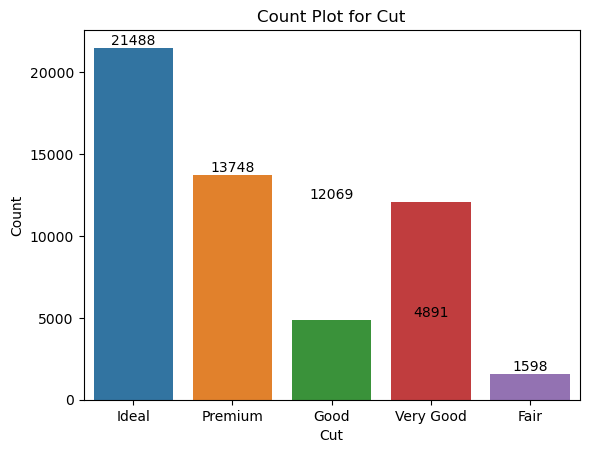

In [24]:
#cut countplot
sns.countplot(data=df, x="cut")
cut_counts = df['cut'].value_counts()
for i, count in enumerate(cut_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.xlabel("Cut")
plt.ylabel("Count")
plt.title("Count Plot for Cut")

Text(0.5, 1.0, 'Count Plot for color')

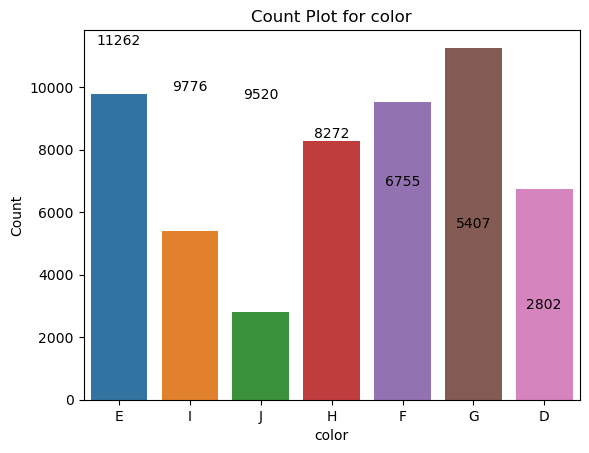

In [21]:
#countplot for color
sns.countplot(data=df, x="color")
cut_counts = df['color'].value_counts()
for i, count in enumerate(cut_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.xlabel("color")
plt.ylabel("Count")
plt.title("Count Plot for color")

Text(0.5, 1.0, 'Count Plot for clarity')

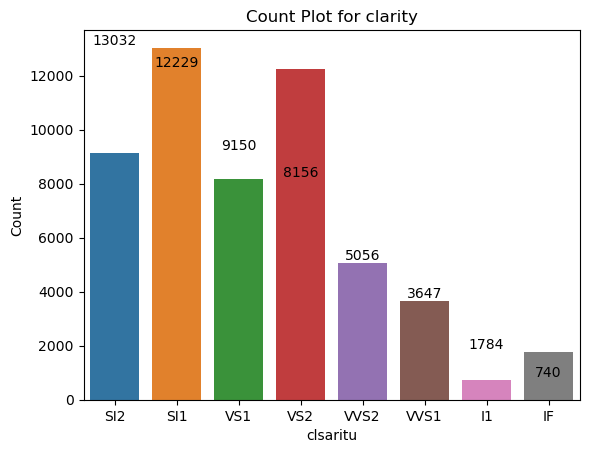

In [22]:
#countplot for clarity
sns.countplot(data=df, x="clarity")
cut_counts = df['clarity'].value_counts()
for i, count in enumerate(cut_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.xlabel("clsaritu")
plt.ylabel("Count")
plt.title("Count Plot for clarity")

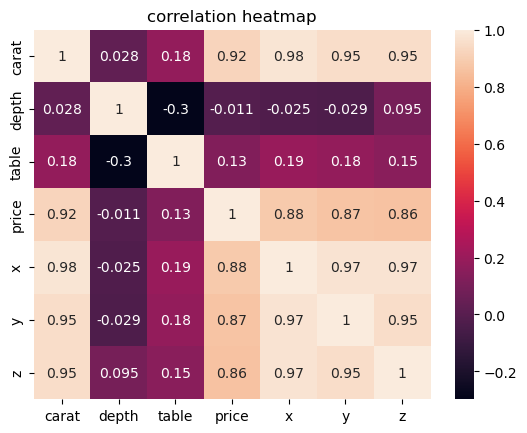

In [22]:
#correlation
sns.heatmap(df.corr(), annot=True)
plt.title("correlation heatmap")
plt.show()

In [23]:
df.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.027861,0.181091,0.921548,0.975380,0.951908,0.953542
depth,0.027861,1.000000,-0.297669,-0.011048,-0.025348,-0.029389,0.094757
table,0.181091,-0.297669,1.000000,0.126566,0.194855,0.183231,0.150270
price,0.921548,-0.011048,0.126566,1.000000,0.884504,0.865395,0.861208
x,0.975380,-0.025348,0.194855,0.884504,1.000000,0.974592,0.970686
y,0.951908,-0.029389,0.183231,0.865395,0.974592,1.000000,0.951844
z,0.953542,0.094757,0.150270,0.861208,0.970686,0.951844,1.000000


### Correlations between each feature and Price :

- Carat : 0.921548 (strongly positive correlation)

- Depth: -0.011048 (very weak negative correlation)

- Table : 0.126566 (weak positive correlation)

- x : 0.884504 (strongly positive correlation)

- y : 0.865395 (strongly positive correlation)

- z : 0.861208 (strongly positive correlation)

# Preprocessing (categorical features)

In [24]:
print(df.cut.unique())
print(df.color.unique())
print(df.clarity.unique())

['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
['E' 'I' 'J' 'H' 'F' 'G' 'D']
['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


In [25]:
#encoding for categorical features 
#for ordinal feature "cut" creating dict for mapping
cut = {'Fair':1,'Good':2,'Very Good':3,'Premium':4,'Ideal':5}
df["cut"] = df['cut'].map(cut)

In [26]:
#for other features
label_encoder = LabelEncoder()
df["color"] = label_encoder.fit_transform(df['color'])

In [27]:
label_encoder = LabelEncoder()
df["clarity"] = label_encoder.fit_transform(df['clarity'])

In [28]:
df.head(1)

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,5,1,3,61.5,55.0,326,3.95,3.98,2.43


In [29]:
df.to_csv("preprocessed_diamond.csv",index=False)

In [30]:
fresh_df = pd.read_csv("preprocessed_diamond.csv")

# train_test_split

In [31]:
df = fresh_df.copy()

In [32]:
X = df.drop('price',axis=1)
X.shape

(53794, 9)

In [33]:
y = df['price']
y.shape

(53794,)

In [34]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2,random_state=42)

# Model Building

In [35]:
#models without cross validation and scaling
models = [
    ("Linear Regression", LinearRegression()),
    ("K-Nearest Neighbors", KNeighborsRegressor()),
    ("Support Vector Machine", SVR()),
    ("Decision Tree", DecisionTreeRegressor()),
    ("Random Forest", RandomForestRegressor())
]

best_model = None
best_rmse = float('inf')
best_mae = float('inf')
best_r2 = -float('inf')

# Looping through the models and evaluate performance
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"{name} - RMSE: {rmse:.2f}, MAE: {mae:.2f}, R²: {r2:.2f}")
    
    # Check if the current model performs better than the best model found so far
    if rmse < best_rmse:
        best_model = model
        best_rmse = rmse
        best_mae = mae
        best_r2 = r2

# best model and its performance
print(f"The best model is {best_model.__class__.__name__} with the following metrics:")
print(f"RMSE: {best_rmse:.2f}, MAE: {best_mae:.2f}, R²: {best_r2:.2f}")

Linear Regression - RMSE: 1306.94, MAE: 838.54, R²: 0.89
K-Nearest Neighbors - RMSE: 874.17, MAE: 471.95, R²: 0.95
Support Vector Machine - RMSE: 4136.36, MAE: 2700.17, R²: -0.12
Decision Tree - RMSE: 703.84, MAE: 349.59, R²: 0.97
Random Forest - RMSE: 512.66, MAE: 261.01, R²: 0.98
The best model is RandomForestRegressor with the following metrics:
RMSE: 512.66, MAE: 261.01, R²: 0.98


In [36]:
#models with CV and without Sandard scaling
# Define the number of splits for cross-validation
n_splits = 5
kf = KFold(n_splits=n_splits)

models = [
    ("Linear Regression", LinearRegression()),
    ("K-Nearest Neighbors", KNeighborsRegressor()),
    ("Support Vector Machine", SVR()),
    ("Decision Tree", DecisionTreeRegressor()),
    ("Random Forest", RandomForestRegressor())
]

best_model = None
best_rmse = float('inf')

# Loop through the models
for name, model in models:
    rmse_scores = []

    # Loop through the cross-validation folds
    for train_index, test_index in kf.split(X, y):
        X_train = X.iloc[train_index]
        y_train = y.iloc[train_index]
        X_test = X.iloc[test_index]
        y_test = y.iloc[test_index]
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        rmse_scores.append(rmse)

    mean_rmse = sum(rmse_scores) / n_splits  # Calculate mean RMSE
    
    print(f"{name} - Mean RMSE: {mean_rmse:.2f}")

    # Check if the current model performs better than the best model found so far
    if mean_rmse < best_rmse:
        best_model = model
        best_rmse = mean_rmse

# Print the best model based on RMSE
print(f"The best model is {best_model.__class__.__name__} with a Mean RMSE of {best_rmse:.2f}")

Linear Regression - Mean RMSE: 1493.77
K-Nearest Neighbors - Mean RMSE: 1710.94
Support Vector Machine - Mean RMSE: 3799.93
Decision Tree - Mean RMSE: 1555.13
Random Forest - Mean RMSE: 1354.66
The best model is RandomForestRegressor with a Mean RMSE of 1354.66


### with StandardScaler

In [37]:
df = fresh_df.copy()

In [38]:
std_scaler = StandardScaler()

In [39]:
# selecting columns and performing StandardScaler
columns_to_scale = ["carat", "depth", "table", "x", "y", "z"]
df[columns_to_scale] = std_scaler.fit_transform(df[columns_to_scale])
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,-1.199402,5,1,3,-0.173495,-1.100486,326,-1.589399,-1.537553,-1.572574
1,-1.241651,4,1,2,-1.362393,1.585691,326,-1.642938,-1.660231,-1.742780
2,-1.199402,2,1,4,-3.390512,3.376475,327,-1.500168,-1.458689,-1.742780
3,-1.072656,4,5,5,0.455922,0.242603,334,-1.366321,-1.318485,-1.288899
4,-1.030407,2,6,3,1.085338,0.242603,335,-1.241397,-1.213332,-1.118694


In [40]:
X = df.drop(columns='price',axis=1)

In [41]:
X.shape

(53794, 9)

In [42]:
y = df['price']

In [43]:
y.shape

(53794,)

In [44]:
# train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
#models with Standard Scaling and without cross validation
models = [
    ("Linear Regression", LinearRegression()),
    ("K-Nearest Neighbors", KNeighborsRegressor()),
    ("Support Vector Machine", SVR()),
    ("Decision Tree", DecisionTreeRegressor()),
    ("Random Forest", RandomForestRegressor())
]

best_model = None
best_rmse = float('inf')
best_mae = float('inf')
best_r2 = -float('inf')

# Looping through the models and evaluate performance
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"{name} - RMSE: {rmse:.2f}, MAE: {mae:.2f}, R²: {r2:.2f}")
    
    # Check if the current model performs better than the best model found so far
    if rmse < best_rmse:
        best_model = model
        best_rmse = rmse
        best_mae = mae
        best_r2 = r2

# best model and its performance
print(f"The best model is {best_model.__class__.__name__} with the following metrics:")
print(f"RMSE: {best_rmse:.2f}, MAE: {best_mae:.2f}, R²: {best_r2:.2f}")

Linear Regression - RMSE: 1306.94, MAE: 838.54, R²: 0.89
K-Nearest Neighbors - RMSE: 712.45, MAE: 376.90, R²: 0.97
Support Vector Machine - RMSE: 2568.14, MAE: 1278.47, R²: 0.57
Decision Tree - RMSE: 695.46, MAE: 346.95, R²: 0.97
Random Forest - RMSE: 513.84, MAE: 260.97, R²: 0.98
The best model is RandomForestRegressor with the following metrics:
RMSE: 513.84, MAE: 260.97, R²: 0.98


In [46]:
#with CV and Scaling
# Define the number of splits for cross-validation
n_splits = 5
kf = KFold(n_splits=n_splits)

models = [
    ("Linear Regression", LinearRegression()),
    ("K-Nearest Neighbors", KNeighborsRegressor()),
    ("Support Vector Machine", SVR()),
    ("Decision Tree", DecisionTreeRegressor()),
    ("Random Forest", RandomForestRegressor())
]

best_model = None
best_rmse = float('inf')

# Loop through the models
for name, model in models:
    rmse_scores = []

    # Loop through the cross-validation folds
    for train_index, test_index in kf.split(X, y):
        X_train = X.iloc[train_index]
        y_train = y.iloc[train_index]
        X_test = X.iloc[test_index]
        y_test = y.iloc[test_index]
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        rmse_scores.append(rmse)

    mean_rmse = sum(rmse_scores) / n_splits  # Calculate mean RMSE
    
    print(f"{name} - Mean RMSE: {mean_rmse:.2f}")

    # Check if the current model performs better than the best model found so far
    if mean_rmse < best_rmse:
        best_model = model
        best_rmse = mean_rmse

# Print the best model based on RMSE
print(f"The best model is {best_model.__class__.__name__} with a Mean RMSE of {best_rmse:.2f}")

Linear Regression - Mean RMSE: 1493.77
K-Nearest Neighbors - Mean RMSE: 1591.52
Support Vector Machine - Mean RMSE: 2044.88
Decision Tree - Mean RMSE: 1557.47
Random Forest - Mean RMSE: 1351.80
The best model is RandomForestRegressor with a Mean RMSE of 1351.80


### with MinMaxScaler

In [47]:
df = fresh_df.copy()
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,5,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,4,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,4,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2,6,3,63.3,58.0,335,4.34,4.35,2.75


In [48]:
mm_scaler = MinMaxScaler()

In [49]:
# selecting columns and performing MinMaxScaler
columns_to_scale = ["carat", "depth", "table", "x", "y", "z"]
df[columns_to_scale] = mm_scaler.fit_transform(df[columns_to_scale])
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.006237,5,1,3,0.513889,0.230769,326,0.367784,0.067572,0.076415
1,0.002079,4,1,2,0.466667,0.346154,326,0.362197,0.065195,0.072642
2,0.006237,2,1,4,0.386111,0.423077,327,0.377095,0.069100,0.072642
3,0.018711,4,5,5,0.538889,0.288462,334,0.391061,0.071817,0.082704
4,0.022869,2,6,3,0.563889,0.288462,335,0.404097,0.073854,0.086478


In [50]:
X = df.drop(columns='price',axis=1)

In [51]:
X.shape

(53794, 9)

In [52]:
y = df['price']

In [53]:
y.shape

(53794,)

In [54]:
#train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
#models with MinMax Scaling and without cross validation
models = [
    ("Linear Regression", LinearRegression()),
    ("K-Nearest Neighbors", KNeighborsRegressor()),
    ("Support Vector Machine", SVR()),
    ("Decision Tree", DecisionTreeRegressor()),
    ("Random Forest", RandomForestRegressor())
]

best_model = None
best_rmse = float('inf')
best_mae = float('inf')
best_r2 = -float('inf')

# Looping through the models and evaluate performance
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"{name} - RMSE: {rmse:.2f}, MAE: {mae:.2f}, R²: {r2:.2f}")
    
    # Check if the current model performs better than the best model found so far
    if rmse < best_rmse:
        best_model = model
        best_rmse = rmse
        best_mae = mae
        best_r2 = r2

# best model and its performance
print(f"The best model is {best_model.__class__.__name__} with the following metrics:")
print(f"RMSE: {best_rmse:.2f}, MAE: {best_mae:.2f}, R²: {best_r2:.2f}")

Linear Regression - RMSE: 1306.94, MAE: 838.54, R²: 0.89
K-Nearest Neighbors - RMSE: 786.78, MAE: 375.61, R²: 0.96
Support Vector Machine - RMSE: 4053.51, MAE: 2617.52, R²: -0.08
Decision Tree - RMSE: 697.77, MAE: 344.54, R²: 0.97
Random Forest - RMSE: 511.76, MAE: 260.11, R²: 0.98
The best model is RandomForestRegressor with the following metrics:
RMSE: 511.76, MAE: 260.11, R²: 0.98


In [56]:
#with CV and MinMax Scaling
# Define the number of splits for cross-validation
n_splits = 5
kf = KFold(n_splits=n_splits)

models = [
    ("Linear Regression", LinearRegression()),
    ("K-Nearest Neighbors", KNeighborsRegressor()),
    ("Support Vector Machine", SVR()),
    ("Decision Tree", DecisionTreeRegressor()),
    ("Random Forest", RandomForestRegressor())
]

best_model = None
best_rmse = float('inf')

# Loop through the models
for name, model in models:
    rmse_scores = []

    # Loop through the cross-validation folds
    for train_index, test_index in kf.split(X, y):
        X_train = X.iloc[train_index]
        y_train = y.iloc[train_index]
        X_test = X.iloc[test_index]
        y_test = y.iloc[test_index]
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        rmse_scores.append(rmse)

    mean_rmse = sum(rmse_scores) / n_splits  # Calculate mean RMSE
    
    print(f"{name} - Mean RMSE: {mean_rmse:.2f}")

    # Check if the current model performs better than the best model found so far
    if mean_rmse < best_rmse:
        best_model = model
        best_rmse = mean_rmse

# Print the best model based on RMSE
print(f"The best model is {best_model.__class__.__name__} with a Mean RMSE of {best_rmse:.2f}")

Linear Regression - Mean RMSE: 1493.77
K-Nearest Neighbors - Mean RMSE: 1596.69
Support Vector Machine - Mean RMSE: 3693.43
Decision Tree - Mean RMSE: 1542.44
Random Forest - Mean RMSE: 1354.98
The best model is RandomForestRegressor with a Mean RMSE of 1354.98


## Conclusions:

### Linear Regression:

- With and Without scaling the perforamnce is not changed much this may tells that Linear Regression is less sensitive to Scaling.

### K-Nearest Neighbors:

- The performance of the model increased after Scaling.

### Support Vector Machine:

- Performance of SVM is wrost compared to others.

### Decision Tree:

- The performance of the model increased after Scaling.

### Random Forest:

- Random Forest perfoms well in all cases but with MinMax Scaling and without Cross Validation has better performance with RMSE = 511.76.

# *Final Conclusion:*

- Random Forest is the winner with MinMaxScaling.